In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import time
!pip install scipy
!pip install -U scikit-learn
!pip install wittgenstein
!pip install sklearn-evaluation
!pip install seaborn
!pip install imblearn

In [3]:
from scipy.io import arff
import pandas as pd
from imblearn.metrics import geometric_mean_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, svm, neighbors
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import f1_score

data = arff.loadarff('ionosphere.arff')
df_iono = pd.DataFrame(data[0])

data = arff.loadarff('diabetes.arff')
df_diabe = pd.DataFrame(data[0])

data = arff.loadarff('vehicle.arff')
df_Vehicle = pd.DataFrame(data[0])

data = arff.loadarff('vowel.arff')
df_vowel = pd.DataFrame(data[0])

data = arff.loadarff('tae.arff')
df_tae = pd.DataFrame(data[0])

data = arff.loadarff('sonar.arff')
df_sonar = pd.DataFrame(data[0])

data = arff.loadarff('spambase.arff')
df_spambase = pd.DataFrame(data[0])

data = arff.loadarff('page_blocks.arff')
df_page = pd.DataFrame(data[0])

data = arff.loadarff('iris.arff')
df_iris = pd.DataFrame(data[0])

data = arff.loadarff('letter.arff')
df_letter = pd.DataFrame(data[0])
# Changing the last categorical class value into a numerical value
df_iono['class'] = pd.factorize(df_iono['class'])[0]
df_iono.head()
# Changing the last categorical class value into a numerical value
df_diabe['class'] = pd.factorize(df_diabe['class'])[0]
df_diabe.head()
# Changing the last categorical class value into a numerical value
df_Vehicle['Class'] = pd.factorize(df_Vehicle['Class'])[0]
df_Vehicle.head()
# Changing the last categorical class value into a numerical value
df_vowel['Class'] = pd.factorize(df_vowel['Class'])[0]
df_vowel.head()
# Changing the last categorical class value into a numerical value
df_tae['Class_attribute'] = pd.factorize(df_tae['Class_attribute'])[0]
df_tae.head()
# Changing the last categorical class value into a numerical value
df_sonar['Class'] = pd.factorize(df_sonar['Class'])[0]
df_sonar.head()
# Changing the last categorical class value into a numerical value
df_spambase['class'] = pd.factorize(df_spambase['class'])[0]
df_spambase.head()
# Changing the last categorical class value into a numerical value
df_page['Class'] = pd.factorize(df_page['Class'])[0]
df_page.head()
# Changing the last categorical class value into a numerical value
df_iris['class'] = pd.factorize(df_iris['class'])[0]
df_iris.head()
# Changing the last categorical class value into a numerical value
df_letter['class'] = pd.factorize(df_letter['class'])[0]

In [4]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

def make_10_fold_decision_tree(x, y, current_table, dataset_str):
    kf = KFold(n_splits=10)

    mean_f1 = []
    mean_of_geometric_mean = []

    for i, (train_index, test_index) in enumerate(kf.split(x, y)):
        train_x, test_x = x[train_index], x[test_index]
        train_y, test_y = y[train_index], y[test_index]

        clf = DecisionTreeClassifier(random_state=0)
        clf.fit(train_x, train_y)

        pred_y = clf.predict(test_x)
        mean_f1.append(f1_score(test_y, pred_y, average="micro"))
        mean_of_geometric_mean.append(geometric_mean_score(test_y, pred_y, average="micro"))

    current_table[dataset_str][0] = np.mean(mean_f1)
    current_table[dataset_str][1] = np.mean(mean_of_geometric_mean)

In [5]:
tree_table = {
    "Ionosphere": [0, 0],
    "Diabetes": [0, 0],
    "Vehicle": [0, 0],
    "Vowel": [0, 0],
    "Tae": [0, 0],
    "Sonar": [0, 0],
    "Spambase": [0, 0],
    "Page blocks": [0, 0],
    "Iris": [0, 0],
    "Letter": [0, 0]
}

In [6]:
make_10_fold_decision_tree(df_diabe.iloc[:, 0:-2].values, df_diabe.iloc[:, -1].values, tree_table, "Diabetes")
make_10_fold_decision_tree(df_iris.iloc[:, 0:-2].values, df_iris.iloc[:, -1].values, tree_table, "Iris")
make_10_fold_decision_tree(df_iono.iloc[:, 0:-2].values, df_iono.iloc[:, -1].values, tree_table, "Ionosphere")
make_10_fold_decision_tree(df_Vehicle.iloc[:, 0:-2].values, df_Vehicle.iloc[:, -1].values, tree_table, "Vehicle")
make_10_fold_decision_tree(df_vowel.iloc[:, 0:-2].values, df_vowel.iloc[:, -1].values, tree_table, "Vowel")
make_10_fold_decision_tree(df_tae.iloc[:, 0:-2].values, df_tae.iloc[:, -1].values, tree_table, "Tae")
make_10_fold_decision_tree(df_sonar.iloc[:, 0:-2].values, df_sonar.iloc[:, -1].values, tree_table, "Sonar")
make_10_fold_decision_tree(df_spambase.iloc[:, 0:-2].values, df_spambase.iloc[:, -1].values, tree_table, "Spambase")
make_10_fold_decision_tree(df_page.iloc[:, 0:-2].values, df_page.iloc[:, -1].values, tree_table, "Page blocks")
make_10_fold_decision_tree(df_letter.iloc[:, 0:-2].values, df_letter.iloc[:, -1].values, tree_table, "Letter")

print(pd.DataFrame(tree_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"}).head())
print(pd.DataFrame(tree_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"}).to_latex())

/home/ricardo/PycharmProjects/Local_IMD/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ricardo/PycharmProjects/Local_IMD/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ricardo/PycharmProjects/Local_IMD/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


            F1-score  Geometric mean
Ionosphere  0.880397        0.880397
Diabetes    0.700513        0.700513
Vehicle     0.933824        0.933824
Vowel       0.954504        0.954504
Tae         0.508333        0.606314
\begin{tabular}{lrr}
\toprule
{} &  F1-score &  Geometric mean \\
\midrule
Ionosphere  &  0.880397 &        0.880397 \\
Diabetes    &  0.700513 &        0.700513 \\
Vehicle     &  0.933824 &        0.933824 \\
Vowel       &  0.954504 &        0.954504 \\
Tae         &  0.508333 &        0.606314 \\
Sonar       &  0.501667 &        0.501667 \\
Spambase    &  0.865043 &        0.865043 \\
Page blocks &  0.955411 &        0.955411 \\
Iris        &  0.906667 &        0.608319 \\
Letter      &  0.875900 &        0.933563 \\
\bottomrule
\end{tabular}



In [7]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC

def make_10_fold_svm(x, y, current_table, dataset_str):
    kf = KFold(n_splits=10)

    mean_f1 = []
    mean_of_geometric_mean = []

    for i, (train_index, test_index) in enumerate(kf.split(x, y)):
        train_x, test_x = x[train_index], x[test_index]
        train_y, test_y = y[train_index], y[test_index]

        clf = SVC(random_state=0)
        clf.fit(train_x, train_y)

        pred_y = clf.predict(test_x)
        mean_f1.append(f1_score(test_y, pred_y, average="micro"))
        mean_of_geometric_mean.append(geometric_mean_score(test_y, pred_y, average="micro"))

    current_table[dataset_str][0] = np.mean(mean_f1)
    current_table[dataset_str][1] = np.mean(mean_of_geometric_mean)

In [8]:
svm_table = {
    "Ionosphere": [0, 0],
    "Diabetes": [0, 0],
    "Vehicle": [0, 0],
    "Vowel": [0, 0],
    "Tae": [0, 0],
    "Sonar": [0, 0],
    "Spambase": [0, 0],
    "Page blocks": [0, 0],
    "Iris": [0, 0],
    "Letter": [0, 0]
}

In [9]:
make_10_fold_svm(df_diabe.iloc[:, 0:-2].values, df_diabe.iloc[:, -1].values, svm_table, "Diabetes")
make_10_fold_svm(df_iris.iloc[:, 0:-2].values, df_iris.iloc[:, -1].values, svm_table, "Iris")
make_10_fold_svm(df_iono.iloc[:, 0:-2].values, df_iono.iloc[:, -1].values, svm_table, "Ionosphere")
make_10_fold_svm(df_Vehicle.iloc[:, 0:-2].values, df_Vehicle.iloc[:, -1].values, svm_table, "Vehicle")
make_10_fold_svm(df_vowel.iloc[:, 0:-2].values, df_vowel.iloc[:, -1].values, svm_table, "Vowel")
make_10_fold_svm(df_tae.iloc[:, 0:-2].values, df_tae.iloc[:, -1].values, svm_table, "Tae")
make_10_fold_svm(df_sonar.iloc[:, 0:-2].values, df_sonar.iloc[:, -1].values, svm_table, "Sonar")
make_10_fold_svm(df_spambase.iloc[:, 0:-2].values, df_spambase.iloc[:, -1].values, svm_table, "Spambase")
make_10_fold_svm(df_page.iloc[:, 0:-2].values, df_page.iloc[:, -1].values, svm_table, "Page blocks")
make_10_fold_svm(df_letter.iloc[:, 0:-2].values, df_letter.iloc[:, -1].values, svm_table, "Letter")

print(svm_table)
print(pd.DataFrame(svm_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"}).head())
print(pd.DataFrame(svm_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"}).to_latex())

/home/ricardo/PycharmProjects/Local_IMD/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ricardo/PycharmProjects/Local_IMD/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ricardo/PycharmProjects/Local_IMD/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ricardo/PycharmP

{'Ionosphere': [0.9373809523809523, 0.9373809523809523], 'Diabetes': [0.7603896103896104, 0.7603896103896105], 'Vehicle': [0.7956022408963586, 0.7956022408963586], 'Vowel': [0.9484023912595341, 0.9484023912595341], 'Tae': [0.18583333333333335, 0.29361698304352923], 'Sonar': [0.45285714285714285, 0.45285714285714285], 'Spambase': [0.7129524662831275, 0.7129524662831275], 'Page blocks': [0.9022438249776485, 0.8022438249776485], 'Iris': [0.9, 0.6016520456585], 'Letter': [0.9105000000000001, 0.9524854243963723]}
            F1-score  Geometric mean
Ionosphere  0.937381        0.937381
Diabetes    0.760390        0.760390
Vehicle     0.795602        0.795602
Vowel       0.948402        0.948402
Tae         0.185833        0.293617
\begin{tabular}{lrr}
\toprule
{} &  F1-score &  Geometric mean \\
\midrule
Ionosphere  &  0.937381 &        0.937381 \\
Diabetes    &  0.760390 &        0.760390 \\
Vehicle     &  0.795602 &        0.795602 \\
Vowel       &  0.948402 &        0.948402 \\
Tae      

In [10]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

def make_10_fold_knn(x, y, current_table, dataset_str):
    kf = KFold(n_splits=10)

    mean_f1 = []
    mean_of_geometric_mean = []

    for i, (train_index, test_index) in enumerate(kf.split(x, y)):
        train_x, test_x = x[train_index], x[test_index]
        train_y, test_y = y[train_index], y[test_index]

        clf = KNeighborsClassifier(n_neighbors=5)
        clf.fit(train_x, train_y)

        pred_y = clf.predict(test_x)
        mean_f1.append(f1_score(test_y, pred_y, average="micro"))
        mean_of_geometric_mean.append(geometric_mean_score(test_y, pred_y, average="micro"))

    current_table[dataset_str][0] = np.mean(mean_f1)
    current_table[dataset_str][1] = np.mean(mean_of_geometric_mean)

In [11]:
knn_table = {
    # ROW
    "Ionosphere": [0, 0], # COL
    "Diabetes": [0, 0],
    "Vehicle": [0, 0],
    "Vowel": [0, 0],
    "Tae": [0, 0],
    "Sonar": [0, 0],
    "Spambase": [0, 0],
    "Page blocks": [0, 0],
    "Iris": [0, 0],
    "Letter": [0, 0]
}

In [12]:
make_10_fold_knn(df_diabe.iloc[:, 0:-2].values, df_diabe.iloc[:, -1].values, knn_table, "Diabetes")
make_10_fold_knn(df_iris.iloc[:, 0:-2].values, df_iris.iloc[:, -1].values, knn_table, "Iris")
make_10_fold_knn(df_iono.iloc[:, 0:-2].values, df_iono.iloc[:, -1].values, knn_table, "Ionosphere")
make_10_fold_knn(df_Vehicle.iloc[:, 0:-2].values, df_Vehicle.iloc[:, -1].values, knn_table, "Vehicle")
make_10_fold_knn(df_vowel.iloc[:, 0:-2].values, df_vowel.iloc[:, -1].values, knn_table, "Vowel")
make_10_fold_knn(df_tae.iloc[:, 0:-2].values, df_tae.iloc[:, -1].values, knn_table, "Tae")
make_10_fold_knn(df_sonar.iloc[:, 0:-2].values, df_sonar.iloc[:, -1].values, knn_table, "Sonar")
make_10_fold_knn(df_spambase.iloc[:, 0:-2].values, df_spambase.iloc[:, -1].values, knn_table, "Spambase")
make_10_fold_knn(df_page.iloc[:, 0:-2].values, df_page.iloc[:, -1].values, knn_table, "Page blocks")
make_10_fold_knn(df_letter.iloc[:, 0:-2].values, df_letter.iloc[:, -1].values, knn_table, "Letter")

print(pd.DataFrame(knn_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"}).head())
print(pd.DataFrame(knn_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"}).to_latex())

/home/ricardo/PycharmProjects/Local_IMD/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ricardo/PycharmProjects/Local_IMD/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ricardo/PycharmProjects/Local_IMD/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


            F1-score  Geometric mean
Ionosphere  0.829286        0.829286
Diabetes    0.709569        0.709569
Vehicle     0.933852        0.933852
Vowel       0.955525        0.955525
Tae         0.449167        0.563544
\begin{tabular}{lrr}
\toprule
{} &  F1-score &  Geometric mean \\
\midrule
Ionosphere  &  0.829286 &        0.829286 \\
Diabetes    &  0.709569 &        0.709569 \\
Vehicle     &  0.933852 &        0.933852 \\
Vowel       &  0.955525 &        0.955525 \\
Tae         &  0.449167 &        0.563544 \\
Sonar       &  0.403571 &        0.403571 \\
Spambase    &  0.849614 &        0.849614 \\
Page blocks &  0.953399 &        0.953399 \\
Iris        &  0.906667 &        0.606667 \\
Letter      &  0.945350 &        0.971226 \\
\bottomrule
\end{tabular}



In [13]:
from scipy.stats import wilcoxon

df_knn = pd.DataFrame(knn_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"})
df_svm = pd.DataFrame(svm_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"})
df_tree = pd.DataFrame(tree_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"})

diff_f1 = df_tree['F1-score'] - df_svm['F1-score']
diff_gmean = df_tree['Geometric mean'] - df_svm['Geometric mean']

print("Tree VS SVM")

# Compute the Wilcoxon test
_, p = wilcoxon(diff_f1)

print(p)

# Compute the Wilcoxon test
_, p = wilcoxon(diff_gmean)

print(p)

Tree VS SVM
0.275390625
0.193359375


In [14]:
from scipy.stats import wilcoxon

df_knn = pd.DataFrame(knn_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"})
df_svm = pd.DataFrame(svm_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"})
df_tree = pd.DataFrame(tree_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"})

diff_f1 = df_tree['F1-score'] - df_knn['F1-score']
diff_gmean = df_tree['Geometric mean'] - df_knn['Geometric mean']

print("Tree VS KNN")

# Compute the Wilcoxon test
_, p = wilcoxon(diff_f1)

print(p)

# Compute the Wilcoxon test
_, p = wilcoxon(diff_gmean)

print(p)

Tree VS KNN
0.3742593192802244
0.232421875


/home/ricardo/PycharmProjects/Local_IMD/venv/lib/python3.9/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/ricardo/PycharmProjects/Local_IMD/venv/lib/python3.9/site-packages/scipy/stats/_morestats.py:3351: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [15]:
from scipy.stats import wilcoxon

df_knn = pd.DataFrame(knn_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"})
df_svm = pd.DataFrame(svm_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"})
df_tree = pd.DataFrame(tree_table).transpose().rename(columns = {0: "F1-score", 1: "Geometric mean"})

diff_f1 = df_svm['F1-score'] - df_knn['F1-score']
diff_gmean = df_svm['Geometric mean'] - df_knn['Geometric mean']

print("SVM vs KNN")

# Compute the Wilcoxon test
_, p = wilcoxon(diff_f1)

print(p)

# Compute the Wilcoxon test
_, p = wilcoxon(diff_gmean)

print(p)

SVM vs KNN
0.275390625
0.232421875


In [16]:
from scipy.stats import friedmanchisquare

friedman_test = friedmanchisquare(df_tree['F1-score'], df_svm['F1-score'], df_knn['F1-score'])

print(friedman_test)

FriedmanchisquareResult(statistic=2.512820512820516, pvalue=0.28467410153159334)


In [17]:
#print(f"SVM ------> \n{df_svm['F1-score'].head(n=10)}")
#print(f"KNN ------> \n{df_knn['F1-score'].head(n=10)}")
#print(f"TREE ------> \n{df_tree['F1-score'].head(n=10)}")
from scipy.stats import rankdata

ranks = {
    "Ionosphere": [0, 0, 0], # COL
    "Diabetes": [0, 0, 0], # COL
    "Vehicle": [0, 0, 0], # COL
    "Vowel": [0, 0, 0], # COL
    "Tae": [0, 0, 0], # COL
    "Sonar": [0, 0, 0], # COL
    "Spambase": [0, 0, 0], # COL
    "Page blocks": [0, 0, 0], # COL
    "Iris": [0, 0, 0], # COL
    "Letter": [0, 0, 0], # COL
}

for index, (current_svm_value, current_knn_value, current_tree_value) in enumerate(zip(df_svm["F1-score"].values, df_knn["F1-score"].values, df_tree["F1-score"].values)):

    current_values = [current_svm_value, current_knn_value, current_tree_value]
    current_ranking = rankdata(current_values)

    ranks[list(ranks.keys())[index]] = current_ranking

print(pd.DataFrame(ranks).transpose().rename(columns={0: "SVM", 1: "KNN", 2: "Tree"}).head(n=10))
print(pd.DataFrame(ranks).transpose().rename(columns={0: "SVM", 1: "KNN", 2: "Tree"}).to_latex())

df_ranks = pd.DataFrame(ranks).transpose().rename(columns={0: "SVM", 1: "KNN", 2: "Tree"})

             SVM  KNN  Tree
Ionosphere   3.0  1.0   2.0
Diabetes     3.0  2.0   1.0
Vehicle      1.0  3.0   2.0
Vowel        1.0  3.0   2.0
Tae          1.0  2.0   3.0
Sonar        2.0  1.0   3.0
Spambase     1.0  2.0   3.0
Page blocks  1.0  2.0   3.0
Iris         1.0  2.5   2.5
Letter       2.0  3.0   1.0
\begin{tabular}{lrrr}
\toprule
{} &  SVM &  KNN &  Tree \\
\midrule
Ionosphere  &  3.0 &  1.0 &   2.0 \\
Diabetes    &  3.0 &  2.0 &   1.0 \\
Vehicle     &  1.0 &  3.0 &   2.0 \\
Vowel       &  1.0 &  3.0 &   2.0 \\
Tae         &  1.0 &  2.0 &   3.0 \\
Sonar       &  2.0 &  1.0 &   3.0 \\
Spambase    &  1.0 &  2.0 &   3.0 \\
Page blocks &  1.0 &  2.0 &   3.0 \\
Iris        &  1.0 &  2.5 &   2.5 \\
Letter      &  2.0 &  3.0 &   1.0 \\
\bottomrule
\end{tabular}



['Ionosphere' 'Diabetes' 'Vehicle' 'Vowel' 'Tae' 'Sonar' 'Spambase'
 'Page blocks' 'Iris' 'Letter']


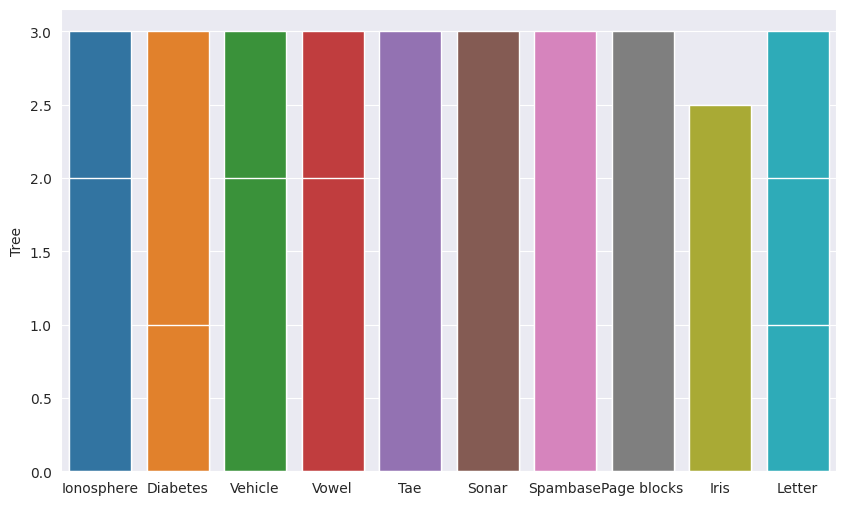

In [18]:
import seaborn as sns

print(df_ranks.index.values)

fig, ax = plt.subplots(figsize=(10, 6))

ax_1 = sns.barplot(data=df_ranks, x=df_ranks.index.values, y="KNN")
ax_2 = sns.barplot(data=df_ranks, x=df_ranks.index.values, y="SVM")
ax_3 = sns.barplot(data=df_ranks, x=df_ranks.index.values, y="Tree")
plt.show()

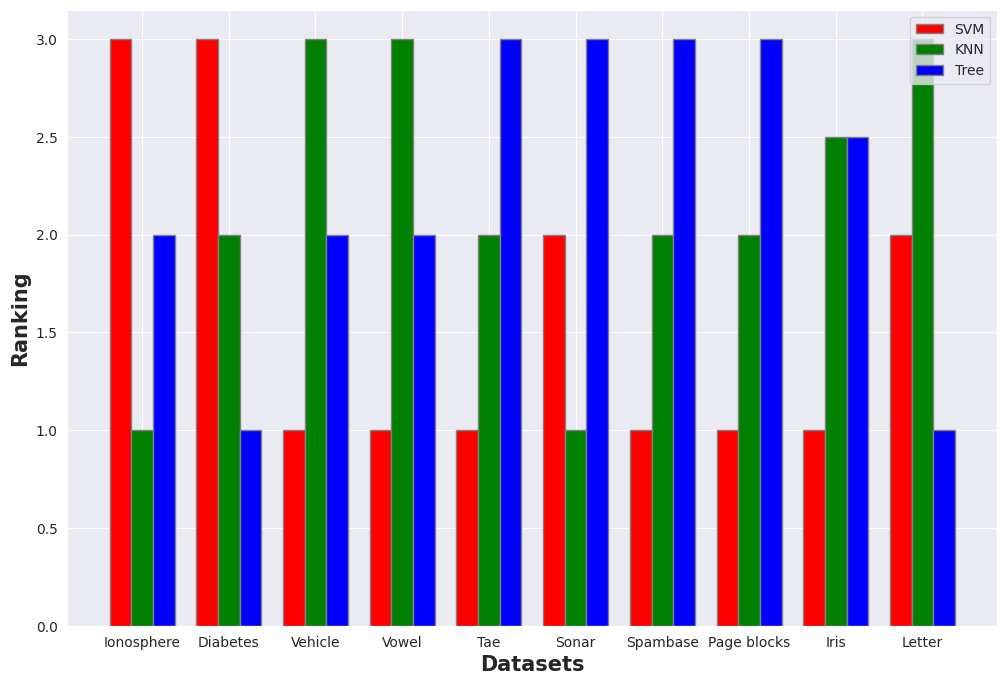

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
IT = df_ranks['SVM'].values
ECE = df_ranks['KNN'].values
CSE = df_ranks['Tree'].values

# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
		edgecolor ='grey', label ='SVM')
plt.bar(br2, ECE, color ='g', width = barWidth,
		edgecolor ='grey', label ='KNN')
plt.bar(br3, CSE, color ='b', width = barWidth,
		edgecolor ='grey', label ='Tree')

# Adding Xticks
plt.xlabel('Datasets', fontweight ='bold', fontsize = 15)
plt.ylabel('Ranking', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
		df_ranks.index.values)

plt.legend()
plt.show()

In [20]:
#print(f"SVM ------> \n{df_svm['F1-score'].head(n=10)}")
#print(f"KNN ------> \n{df_knn['F1-score'].head(n=10)}")
#print(f"TREE ------> \n{df_tree['F1-score'].head(n=10)}")
from scipy.stats import rankdata

ranks = {
    "Ionosphere": [0, 0, 0], # COL
    "Diabetes": [0, 0, 0], # COL
    "Vehicle": [0, 0, 0], # COL
    "Vowel": [0, 0, 0], # COL
    "Tae": [0, 0, 0], # COL
    "Sonar": [0, 0, 0], # COL
    "Spambase": [0, 0, 0], # COL
    "Page blocks": [0, 0, 0], # COL
    "Iris": [0, 0, 0], # COL
    "Letter": [0, 0, 0], # COL
}

for index, (current_svm_value, current_knn_value, current_tree_value) in enumerate(zip(df_svm["Geometric mean"].values, df_knn["Geometric mean"].values, df_tree["Geometric mean"].values)):

    current_values = [current_svm_value, current_knn_value, current_tree_value]
    current_ranking = rankdata(current_values)

    ranks[list(ranks.keys())[index]] = current_ranking

print(pd.DataFrame(ranks).transpose().rename(columns={0: "SVM", 1: "KNN", 2: "Tree"}).head(n=10))
print(pd.DataFrame(ranks).transpose().rename(columns={0: "SVM", 1: "KNN", 2: "Tree"}).to_latex())

df_ranks = pd.DataFrame(ranks).transpose().rename(columns={0: "SVM", 1: "KNN", 2: "Tree"})

             SVM  KNN  Tree
Ionosphere   3.0  1.0   2.0
Diabetes     3.0  2.0   1.0
Vehicle      1.0  3.0   2.0
Vowel        1.0  3.0   2.0
Tae          1.0  2.0   3.0
Sonar        2.0  1.0   3.0
Spambase     1.0  2.0   3.0
Page blocks  1.0  2.0   3.0
Iris         1.0  2.0   3.0
Letter       2.0  3.0   1.0
\begin{tabular}{lrrr}
\toprule
{} &  SVM &  KNN &  Tree \\
\midrule
Ionosphere  &  3.0 &  1.0 &   2.0 \\
Diabetes    &  3.0 &  2.0 &   1.0 \\
Vehicle     &  1.0 &  3.0 &   2.0 \\
Vowel       &  1.0 &  3.0 &   2.0 \\
Tae         &  1.0 &  2.0 &   3.0 \\
Sonar       &  2.0 &  1.0 &   3.0 \\
Spambase    &  1.0 &  2.0 &   3.0 \\
Page blocks &  1.0 &  2.0 &   3.0 \\
Iris        &  1.0 &  2.0 &   3.0 \\
Letter      &  2.0 &  3.0 &   1.0 \\
\bottomrule
\end{tabular}



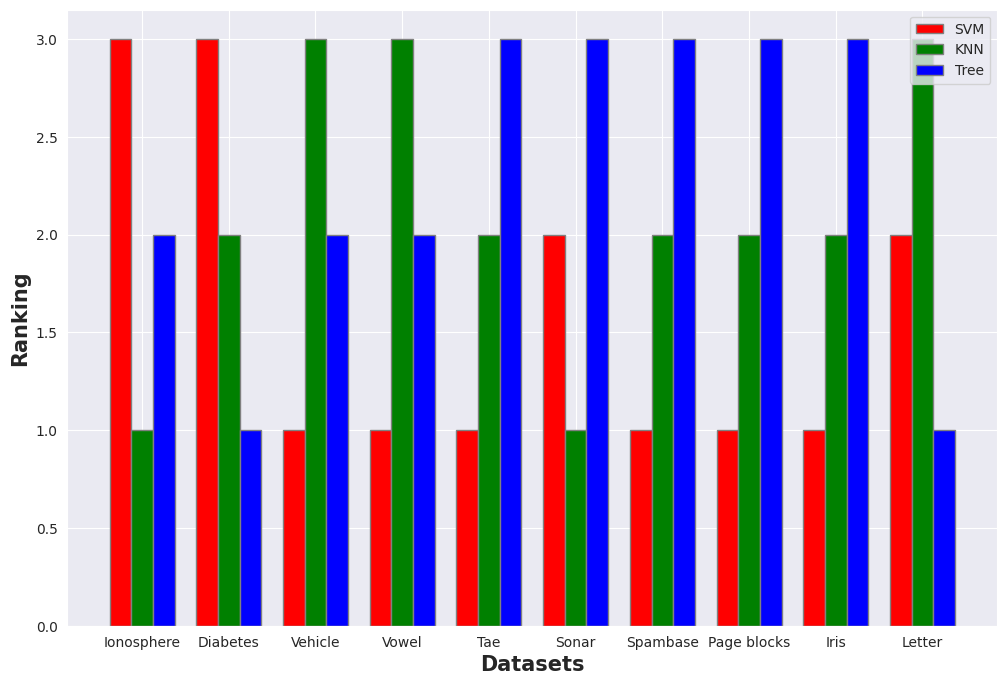

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
IT = df_ranks['SVM'].values
ECE = df_ranks['KNN'].values
CSE = df_ranks['Tree'].values

# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
		edgecolor ='grey', label ='SVM')
plt.bar(br2, ECE, color ='g', width = barWidth,
		edgecolor ='grey', label ='KNN')
plt.bar(br3, CSE, color ='b', width = barWidth,
		edgecolor ='grey', label ='Tree')

# Adding Xticks
plt.xlabel('Datasets', fontweight ='bold', fontsize = 15)
plt.ylabel('Ranking', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
		df_ranks.index.values)

plt.legend()
plt.show()

In [22]:
df_concat_f1_score = pd.DataFrame()

df_concat_f1_score['SVM'] = df_svm['F1-score']
df_concat_f1_score['KNN'] = df_knn['F1-score']
df_concat_f1_score['Tree'] = df_tree['F1-score']

print(df_concat_f1_score.head(n=10))

                  SVM       KNN      Tree
Ionosphere   0.937381  0.829286  0.880397
Diabetes     0.760390  0.709569  0.700513
Vehicle      0.795602  0.933852  0.933824
Vowel        0.948402  0.955525  0.954504
Tae          0.185833  0.449167  0.508333
Sonar        0.452857  0.403571  0.501667
Spambase     0.712952  0.849614  0.865043
Page blocks  0.902244  0.953399  0.955411
Iris         0.900000  0.906667  0.906667
Letter       0.910500  0.945350  0.875900


In [23]:
from scipy.stats import chi2


def compute_iman_davenport_statistic(performance_matrix):
    # Compute the ranks of the model performance on each dataset
    ranks = np.apply_along_axis(lambda x: len(x) - np.argsort(np.argsort(x)), 1, performance_matrix)

    # Sum the ranks for each model across all datasets
    rank_sums = np.sum(ranks, axis=0)

    # Compute the iman Davenport statistic
    iman_davenport_statistic = (np.max(rank_sums) - np.min(rank_sums)) / performance_matrix.shape[1]

    return iman_davenport_statistic


def compute_p_value(iman_davenport_statistic, num_models, num_datasets):
    # Compute the degrees of freedom for the iman Davenport test
    df = num_models - 1

    # Compute the p-value using the chi-squared distribution
    p_value = 1 - chi2.cdf(iman_davenport_statistic, df)

    return p_value


def iman_davenport_test(performance_matrix, significance_level):
    # Compute the iman Davenport statistic and p-value
    iman_davenport_statistic = compute_iman_davenport_statistic(performance_matrix)
    p_value = compute_p_value(iman_davenport_statistic, performance_matrix.shape[1], performance_matrix.shape[0])

    # Determine whether the difference in performance between the models is statistically significant
    if p_value < significance_level:
        print(f"The difference in performance between the models is statistically significant (p = {p_value:.3f})")
    else:
        print(f"The difference in performance between the models is not statistically significant (p = {p_value:.3f})")
    return p_value

performance_matrix = df_concat_f1_score.values

# Run the iman Davenport test
p_value = iman_davenport_test(performance_matrix, 0.05)

The difference in performance between the models is not statistically significant (p = 0.311)


In [24]:
from scipy.stats import friedmanchisquare

friedman_test = friedmanchisquare(df_tree['F1-score'], df_svm['F1-score'], df_knn['F1-score'])

print(friedman_test)

FriedmanchisquareResult(statistic=2.512820512820516, pvalue=0.28467410153159334)


In [25]:
!pip install scikit-posthocs

In [26]:
np_svm = df_concat_f1_score['SVM'].values
print(np_svm)

np_tree = df_concat_f1_score['Tree'].values
print(np_tree)

np_knn = df_concat_f1_score['KNN'].values
print(np_knn)

[0.93738095 0.76038961 0.79560224 0.94840239 0.18583333 0.45285714
 0.71295247 0.90224382 0.9        0.9105    ]
[0.88039683 0.70051265 0.93382353 0.95450423 0.50833333 0.50166667
 0.86504338 0.95541107 0.90666667 0.8759    ]
[0.82928571 0.70956938 0.93385154 0.95552463 0.44916667 0.40357143
 0.84961379 0.95339876 0.90666667 0.94535   ]


In [27]:
#import scikit_posthocs as sp

#sp.posthoc_ttest([np_svm, np_tree, np_knn], p_adjust=None)

In [28]:
#sp.posthoc_ttest(df_concat_f1_score.values, p_adjust='holm').to_latex()

In [29]:
ranks = df_ranks.values

print(ranks)

avg_ranking = [np.sum(ranks[:, 0]) / ranks.shape[0], np.sum(ranks[:, 1]) / ranks.shape[0], np.sum(ranks[:, 2]) / ranks.shape[0]]
print(avg_ranking)

[[3. 1. 2.]
 [3. 2. 1.]
 [1. 3. 2.]
 [1. 3. 2.]
 [1. 2. 3.]
 [2. 1. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]
 [2. 3. 1.]]
[1.6, 2.1, 2.3]


In [30]:
import math

def bonferroni_dunn_z(r_i, r_j, k, n):
    z = (r_i - r_j) / math.sqrt((k*(k + 1)) / 6*n)

    return z

In [31]:
z_0_1 = bonferroni_dunn_z(avg_ranking[0], avg_ranking[1], 3, 10)
z_0_2 = bonferroni_dunn_z(avg_ranking[0], avg_ranking[2], 3, 10)
z_1_2 = bonferroni_dunn_z(avg_ranking[1], avg_ranking[2], 3, 10)

df_bonferroni_dun = pd.DataFrame()
arr = [z_0_1, z_0_2, z_1_2]

df_bonferroni_dun['Z'] = arr
df_bonferroni_dun['Model pairwise'] = ['Z_0_1', 'Z_0_2', 'Z_1_2']
df_bonferroni_dun = df_bonferroni_dun.set_index('Model pairwise')

df_bonferroni_dun.style.hide_index()
df_bonferroni_dun.head()

,Z
Model pairwise,
Z_0_1,-0.111803
Z_0_2,-0.156525
Z_1_2,-0.044721


In [32]:
df_bonferroni_dun.to_latex()

'\\begin{tabular}{lr}\n\\toprule\n{} &         Z \\\\\nModel pairwise &           \\\\\n\\midrule\nZ\\_0\\_1          & -0.111803 \\\\\nZ\\_0\\_2          & -0.156525 \\\\\nZ\\_1\\_2          & -0.044721 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [33]:
from scipy.stats import norm

df_bonferroni_dun['p-value'] = [1.0 - norm.cdf(z_0_1), 1.0 - norm.cdf(z_0_2), 1.0 - norm.cdf(z_1_2)]
df_bonferroni_dun['Bonferroni(α/6)'] = [0.05 / 3, 0.05 / 3, 0.05 / 3]

# Ranking by i
df_bonferroni_dun['Holm(α/(7 - i))'] = [0.05 / (7 - 2), 0.05 / (7 - 3), 0.05 / (7 - 1)]

df_bonferroni_dun.head()

,Z,p-value,Bonferroni(α/6),Holm(α/(7 - i))
Model pairwise,,,,
Z_0_1,-0.111803,0.544510,0.016667,0.010000
Z_0_2,-0.156525,0.562190,0.016667,0.012500
Z_1_2,-0.044721,0.517835,0.016667,0.008333


In [34]:
df_bonferroni_dun.to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n{} &         Z &   p-value &  Bonferroni(α/6) &  Holm(α/(7 - i)) \\\\\nModel pairwise &           &           &                  &                  \\\\\n\\midrule\nZ\\_0\\_1          & -0.111803 &  0.544510 &         0.016667 &         0.010000 \\\\\nZ\\_0\\_2          & -0.156525 &  0.562190 &         0.016667 &         0.012500 \\\\\nZ\\_1\\_2          & -0.044721 &  0.517835 &         0.016667 &         0.008333 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [58]:
from sklearn.metrics import make_scorer

parametersTree = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random']
}

current_table = dict()

def scoringF1Score(est, X, y):
    return f1_score(y_pred=est.predict(X), y_true=y, average="micro")

def scoringGMean(est, X, y):
  return geometric_mean_score(y_pred=est.predict(X), y_true=y, average="micro")

def make_10_fold_tree(x, y, current_table, dataset_str):

    optimalTree_f1 = GridSearchCV(estimator=DecisionTreeClassifier(), cv=10, param_grid=parametersTree, n_jobs=2,  scoring=scoringF1Score)
    optimalTree_gm = GridSearchCV(estimator=DecisionTreeClassifier(), cv=10, param_grid=parametersTree, n_jobs=2,  scoring=scoringGMean)

    optimalTree_f1.fit(x, y)
    optimalTree_gm.fit(x, y)

    current_table[dataset_str] = [pd.DataFrame.from_dict(optimalTree_f1.cv_results_).sort_values('rank_test_score').iloc[0, :]['mean_test_score'], pd.DataFrame.from_dict(optimalTree_gm.cv_results_).sort_values('rank_test_score').iloc[0, :]['mean_test_score']]

    print(f"Current dataset {dataset_str} (F1). Best hiper-parameters found: {optimalTree_f1.best_params_}")
    print(f"Current dataset {dataset_str} (GM). Best hiper-parameters found: {optimalTree_gm.best_params_}")

make_10_fold_tree(df_diabe.iloc[:, 0:-2].values, df_diabe.iloc[:, -1].values, current_table, "Diabetes")
make_10_fold_tree(df_iris.iloc[:, 0:-2].values, df_iris.iloc[:, -1].values, current_table, "Iris")
make_10_fold_tree(df_iono.iloc[:, 0:-2].values, df_iono.iloc[:, -1].values, current_table, "Ionosphere")
make_10_fold_tree(df_Vehicle.iloc[:, 0:-2].values, df_Vehicle.iloc[:, -1].values, current_table, "Vehicle")
make_10_fold_tree(df_vowel.iloc[:, 0:-2].values, df_vowel.iloc[:, -1].values, current_table, "Vowel")
make_10_fold_tree(df_tae.iloc[:, 0:-2].values, df_tae.iloc[:, -1].values, current_table, "Tae")
make_10_fold_tree(df_sonar.iloc[:, 0:-2].values, df_sonar.iloc[:, -1].values, current_table, "Sonar")
make_10_fold_tree(df_spambase.iloc[:, 0:-2].values, df_spambase.iloc[:, -1].values, current_table, "Spambase")
make_10_fold_tree(df_page.iloc[:, 0:-2].values, df_page.iloc[:, -1].values, current_table, "Page blocks")
make_10_fold_tree(df_letter.iloc[:, 0:-2].values, df_letter.iloc[:, -1].values, current_table, "Letter")

Current dataset Diabetes (F1). Best hiper-parameters found: {'criterion': 'entropy', 'splitter': 'best'}
Current dataset Diabetes (GM). Best hiper-parameters found: {'criterion': 'entropy', 'splitter': 'best'}
Current dataset Iris (F1). Best hiper-parameters found: {'criterion': 'gini', 'splitter': 'best'}
Current dataset Iris (GM). Best hiper-parameters found: {'criterion': 'entropy', 'splitter': 'random'}
Current dataset Ionosphere (F1). Best hiper-parameters found: {'criterion': 'gini', 'splitter': 'best'}
Current dataset Ionosphere (GM). Best hiper-parameters found: {'criterion': 'log_loss', 'splitter': 'random'}
Current dataset Vehicle (F1). Best hiper-parameters found: {'criterion': 'log_loss', 'splitter': 'random'}
Current dataset Vehicle (GM). Best hiper-parameters found: {'criterion': 'log_loss', 'splitter': 'random'}
Current dataset Vowel (F1). Best hiper-parameters found: {'criterion': 'entropy', 'splitter': 'best'}
Current dataset Vowel (GM). Best hiper-parameters found: {'

In [60]:
grid_df = pd.DataFrame(current_table).transpose().rename(columns = {0: 'F1-score', 1: 'Geometric mean'})

grid_df.head(n=10)

,F1-score,Geometric mean
Diabetes,0.712269,0.708339
Iris,0.953333,0.964865
Ionosphere,0.894603,0.891667
Vehicle,0.943319,0.949216
Vowel,0.975716,0.968646
Tae,0.581667,0.670002
Sonar,0.726190,0.688333
Spambase,0.913708,0.915014
Page blocks,0.960342,0.959246
Letter,0.880850,0.937338


In [80]:
df_concat_grid = pd.DataFrame()

df_concat_grid['Tree vanilla'] = df_tree['F1-score']
df_concat_grid['Tree optimized'] = grid_df['F1-score']

performance_matrix = df_concat_grid.values

# Run the iman Davenport test
print("F1-score")
p_value = iman_davenport_test(performance_matrix, 0.05)

F1-score
The difference in performance between the models is statistically significant (p = 0.025)


In [83]:
df_concat_grid = pd.DataFrame()

df_concat_grid['Tree vanilla'] = df_tree['Geometric mean']
df_concat_grid['Tree optimized'] = grid_df['Geometric mean']

performance_matrix = df_concat_grid.values

# Run the iman Davenport test
print("Geometric mean")
p_value = iman_davenport_test(performance_matrix, 0.05)

Geometric mean
The difference in performance between the models is statistically significant (p = 0.025)
